In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
def generate_patterned_sequences(length, num_sequences):
    sequences = np.zeros((num_sequences, length), dtype=int)
    structures = np.zeros(num_sequences, dtype=int)
    
    # Crear una lista de funciones matemáticas y sus correspondientes estructuras
    math_functions = [
        (lambda x: int((np.sin(x / length * 2 * np.pi) + 1) * 10), 0),
        (lambda x: int((np.cos(x / length * 2 * np.pi) + 1) * 10), 1),
        (lambda x: int((np.tan(x / length * np.pi / 2) + 1) * 10), 2),
        (lambda x: int((np.log1p(x) / np.log1p(length) * 20)), 3),
        (lambda x: int((np.sqrt(x / length) * 20)), 4),
        (lambda x: int((np.exp(x / length) / np.exp(1) * 20)), 5),
        (lambda x: int((np.arcsin(x / length) / np.pi * 20)), 6),
        (lambda x: int((np.arccos(x / length) / np.pi * 20)), 7),
        (lambda x: int((np.arctan(x / length) / np.pi * 20)), 8),
        (lambda x: int((np.sinh(x / length) / np.sinh(1) * 20)), 9)
    ]

    functions, structure_types = zip(*math_functions)

    for i in range(num_sequences):
        # Seleccionar una función matemática aleatoria para cada secuencia
        idx = np.random.choice(len(functions))
        math_function = functions[idx]
        structure = structure_types[idx]
        structures[i] = structure
        for j in range(length):
            # Usar la función matemática seleccionada
            base_value = math_function(j)
            # Aplicar una alteración aleatoria
            alteration = np.random.randint(-2, 3)  # Alteración entre -2 y 2
            aminoacid_index = np.clip(base_value + alteration, 0, 19)  # Asegurarse de que el índice esté en el rango válido
            sequences[i, j] = aminoacid_index
    
    return sequences, structures


In [10]:
# Generar datos de ejemplo para diferentes longitudes de cadenas
lengths = [10, 20, 30]  # Ejemplos de diferentes longitudes de cadenas
data = {}

#for length in lengths:
#    # Cada secuencia es un vector de longitud 'length', y las estructuras esperadas pueden ser de 10 tipos diferentes (0-9)
#    sequences = np.random.rand(1000, length)
#    sequences = np.random.randint(0, 21, size=(1000, length))
#    structures = np.random.randint(10, size=1000)
#    data[length] = (sequences, structures)

for length in lengths:
    # Generar secuencias de ejemplo
    patterned_sequences,structures = generate_patterned_sequences(length=length, num_sequences=1000)    
    data[length] = (patterned_sequences, structures)
    print(patterned_sequences[:10])

[[ 0  0  2  0  2  2  1  5  5  2]
 [ 8 13 19 19 15  8  2  0  0  2]
 [ 9 17 19 19 15  8  3  2  2  3]
 [19 19 14  4  1  0  2  6 15 19]
 [ 9 12 12 14 19 18 19 19 19 19]
 [12  9  6  9  5  5  7  7  3  1]
 [ 0  0  3  3  8  9 10 14 15 18]
 [19 17 15  6  3  0  2  6 14 16]
 [ 2  1  2  1  0  4  2  6  4  8]
 [ 5  7  8 10 12 14 12 12 14 19]]
[[ 0  3  8  7  9 10 11 12 12 16 17 17 17 15 19 19 18 19 19 19]
 [ 6  8 10  9 10 10 11 11 10 10 14 14 12 12 16 16 14 18 19 17]
 [11  9  8 10  9  9  8  6  8  5  8  5  6  4  4  3  5  1  1  0]
 [ 0  0  0  2  2  2  0  0  4  3  5  3  5  5  5  5  5  7  6  8]
 [ 1  1  1  0  1  2  3  4  2  3  3  5  3  6  3  6  6  8  5  8]
 [ 8  8  9  7  8 11  8 12 12 10 12 10 14 12 15 14 16 18 17 19]
 [ 0  1  0  2  2  4  7  5  6  5  9  8  8 11 10 15 13 17 17 18]
 [ 0  4  7 10 10 10 10 11 12 13 13 16 15 16 19 17 18 17 17 19]
 [11  7 10 11  8  6  7  7  5  7  6  7  6  4  7  5  4  1  2  3]
 [10 10 12 13 14 13 15 18 19 19 18 19 19 19 19 19 19 19 19 19]]
[[10 11 15 13 16 18 17 17 19 18 19 17 

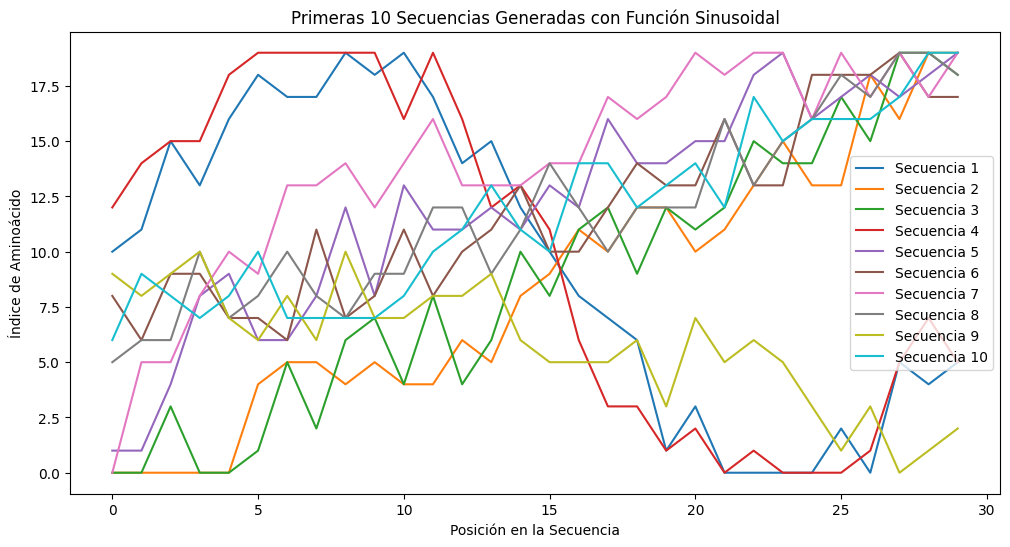

In [11]:
# Graficar las primeras 10 secuencias generadas con la función sinusoidal
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(patterned_sequences[i], label=f'Secuencia {i+1}')
plt.title('Primeras 10 Secuencias Generadas con Función Sinusoidal')
plt.xlabel('Posición en la Secuencia')
plt.ylabel('Índice de Aminoácido')
plt.legend()
plt.show()

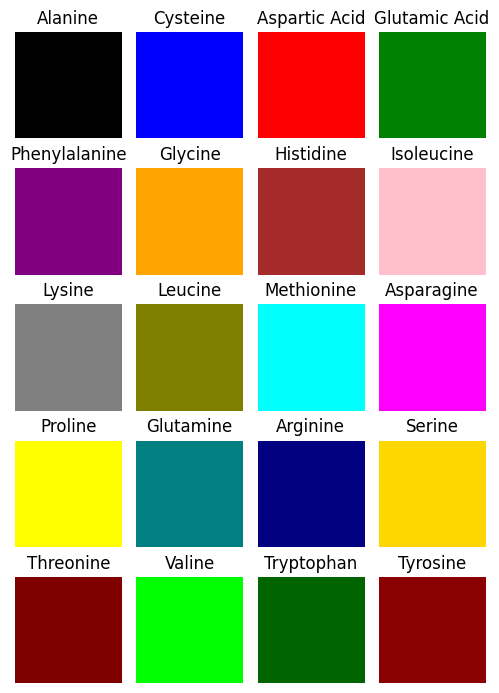

In [12]:
##array con los nombres reales de los 20 aminoacidos
import matplotlib


aminoacids = ['Alanine', 'Cysteine', 'Aspartic Acid', 'Glutamic Acid', 'Phenylalanine', 'Glycine', 'Histidine', 'Isoleucine', 'Lysine', 'Leucine',
              'Methionine', 'Asparagine', 'Proline', 'Glutamine', 'Arginine', 'Serine', 'Threonine', 'Valine', 'Tryptophan', 'Tyrosine']

# Asignar colores a cada aminoácido
aminoacid_colors = {
    'Alanine': 'black',
    'Cysteine': 'blue',
    'Aspartic Acid': 'red',
    'Glutamic Acid': 'green',
    'Phenylalanine': 'purple',
    'Glycine': 'orange',
    'Histidine': 'brown',
    'Isoleucine': 'pink',
    'Lysine': 'gray',
    'Leucine': 'olive',
    'Methionine': 'cyan',
    'Asparagine': 'magenta',
    'Proline': 'yellow',
    'Glutamine': 'teal',
    'Arginine': 'navy',
    'Serine': 'gold',
    'Threonine': 'maroon',
    'Valine': 'lime',
    'Tryptophan': 'darkgreen',
    'Tyrosine': 'darkred'
}

#mostrar la tabla de colores con sus respectivos aminoacidos en grid de 4x5 en el centro de cada celda el nombre del aminoacido y la celda con el color correspondiente
def plot_aminoacids():
    fig, ax = plt.subplots(5, 4, figsize=(5, 7))
    for i, aminoacid in enumerate(aminoacids):
        row, col = i // 4, i % 4
        ax[row, col].imshow(np.ones((1, 1, 3), dtype=float) * np.array(matplotlib.colors.to_rgb(aminoacid_colors[aminoacid])),
                            interpolation='nearest')
        ax[row, col].set_title(aminoacid)
        ax[row, col].axis('off')
    plt.tight_layout()
    plt.show()


plot_aminoacids()

def plot_sequences_and_structures(length, sequences, structures):
    cantidadGraficar = 10     
    # Graficar 'cantidadGraficar' ejemplos de secuencias y estructuras
    plt.figure(figsize=(12, 6))    
    # Graficar las secuencias con colores correspondientes a los aminoácidos
    plt.subplot(1, 2, 1)
    valid_sequences = np.clip(sequences[:cantidadGraficar], 0, len(aminoacids) - 1)
    colored_sequences = np.vectorize(lambda x: matplotlib.colors.to_rgb(aminoacid_colors[aminoacids[x]]))(valid_sequences)
    colored_sequences = np.transpose(colored_sequences, (0, 2, 1))  # Transpose to match the expected shape
    colored_sequences = np.reshape(colored_sequences, (cantidadGraficar, length, 3))  # Reshape to (height, width, 3)
    plt.imshow(colored_sequences, aspect='auto')
    plt.colorbar()
    plt.title(f'Secuencias (Longitud {length})')
    plt.xlabel('Posición en la secuencia')
    plt.ylabel('Índice de la secuencia')    
    # Graficar las estructuras
    plt.subplot(1, 2, 2)
    plt.hist(structures[:cantidadGraficar], bins=10, edgecolor='black')
    plt.title(f'Estructuras (Longitud {length})')
    plt.xlabel('Clase de estructura')
    plt.ylabel('Frecuencia')    
    plt.tight_layout()
    plt.show()

In [13]:
# Definir una función para entrenar y predecir
def train_and_predict(length):
    # Obtener las secuencias y estructuras
    sequences, structures = data[length]
    # Convertir las etiquetas a formato categórico
    structures_categorical = to_categorical(structures, num_classes=10)

    plot_sequences_and_structures(length, sequences, structures)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(sequences, structures_categorical, test_size=0.2, random_state=42)

    # Crear el modelo
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(length,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 clases de salida

    # Compilar el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Longitud de cadena: {length} | Pérdida: {loss:.4f} | Precisión: {accuracy:.4f}')

    # Hacer predicciones
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Mostrar algunas predicciones
    print(f'Predicciones para longitud {length}: {predicted_classes[:10]}')
    print(f'Clases verdaderas: {true_classes[:10]}')
    print('-' * 50)
    # Calcular precisión
    correct_predictions = sum(1 for true, pred in zip(true_classes, predicted_classes) if true == pred)
    total_predictions = len(true_classes)
    accuracy = correct_predictions / total_predictions

    print(f'Precisión de pruebas: {accuracy:.4f}')  

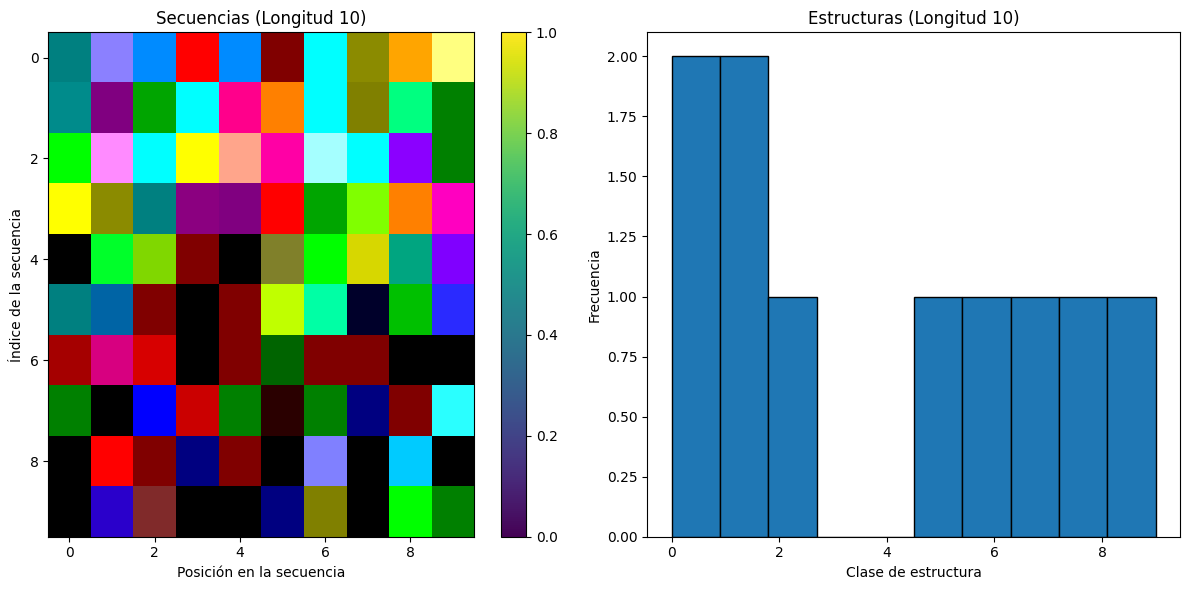

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.1929 - loss: 3.4771
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.5533 - loss: 1.2300
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.6842 - loss: 0.9307
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.7651 - loss: 0.6728
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8003 - loss: 0.5474
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8236 - loss: 0.4877
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8445 - loss: 0.4167
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8382 - loss: 0.3877
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8716 - loss: 0.3451
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.8819 - loss: 0.3184
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8873 - loss: 0.3161
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

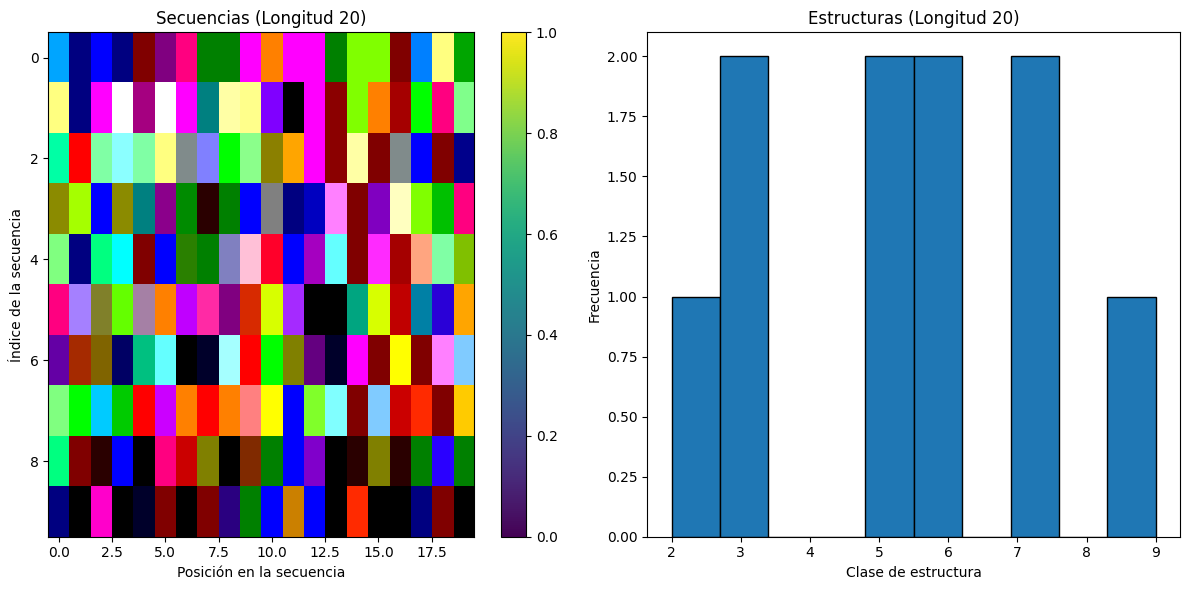

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.1641 - loss: 4.4445
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.5565 - loss: 1.2562
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.6902 - loss: 0.8715
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7914 - loss: 0.6440
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8239 - loss: 0.4988
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8524 - loss: 0.4253
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.9227 - loss: 0.3120
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9259 - loss: 0.2612
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.9460 - loss: 0.2409
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.9514 - loss: 0.2111
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9509 - loss: 0.1845
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

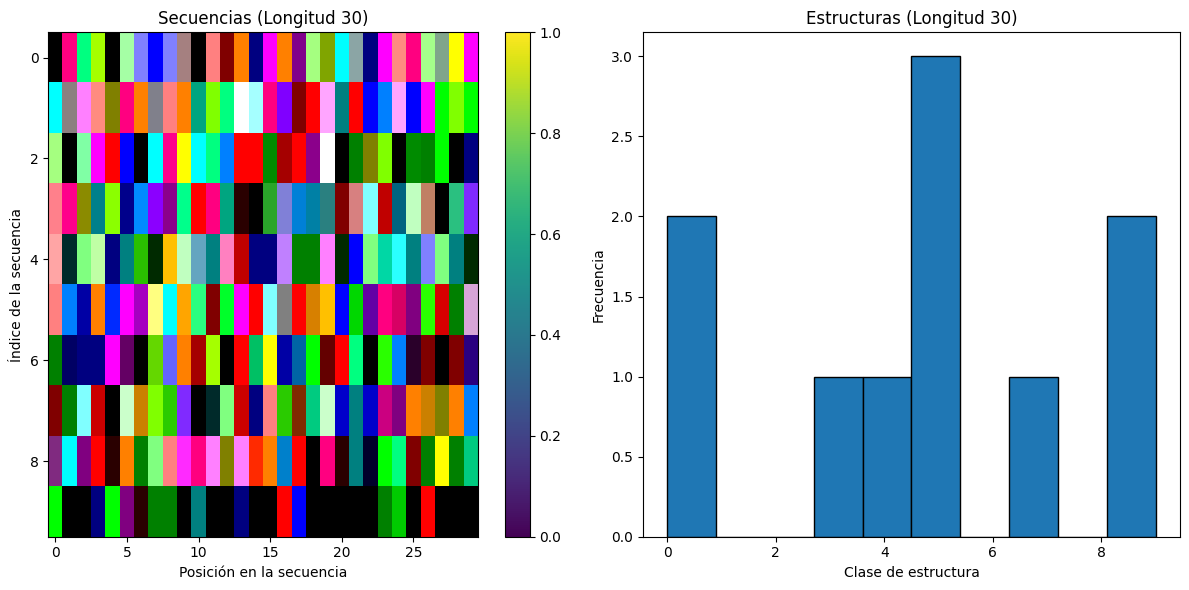

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.1994 - loss: 4.8035
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.6518 - loss: 1.0194
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.8129 - loss: 0.6164
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9001 - loss: 0.4065
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.9252 - loss: 0.3088
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9492 - loss: 0.2285
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.9661 - loss: 0.1704
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.9812 - loss: 0.1251
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9839 - loss: 0.1073
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9798 - loss: 0.0981
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9796 - loss: 0.0894
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

In [14]:
# Entrenar y predecir para cada longitud de cadena
for length in lengths:
    train_and_predict(length)